# Project 8: Personal Data & Visualization 


# Part 1: Extracting timestamps from your personal data


In [33]:
#import packages 
#Author: Emily 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
import datetime

In [34]:
#importing, reading, parsing and extracting my own personal data

emily_ip_logs = pd.read_csv("ip_logs.csv")
emily_ip_logs["date"][1:-1].to_csv("Emily_SocialMedia_timestamps.csv")
emily_ip_logs

,date,ip
0,registration ip,71.85.26.71
1,2022-12-27 02:06:16 UTC,107.77.205.173
2,2022-12-30 06:23:07 UTC,71.85.26.71
3,2022-12-30 23:44:21 UTC,71.85.26.71
4,2022-12-31 06:14:25 UTC,71.85.26.71
...,...,...
149,2023-04-04 00:50:28 UTC,71.85.26.71
150,2023-04-04 04:41:37 UTC,71.85.26.71
151,2023-04-04 06:58:32 UTC,71.85.26.71
152,2023-04-04 15:17:15 UTC,71.85.26.71



# Part 2: Analyzing timestamp data for patterns

In [35]:
levy_ip_logs = pd.read_csv("Activities.csv")
levy_ip_logs = pd.DataFrame(levy_ip_logs["Activity Timestamp"])

In [36]:
levy_ip_logs

,Activity Timestamp
0,2023-03-10 07:38:20 UTC
1,2023-03-10 07:38:20 UTC
2,2023-03-10 07:38:08 UTC
3,2023-03-10 07:38:08 UTC
4,2023-03-10 07:37:49 UTC
...,...
288502,2023-02-11 08:26:25 UTC
288503,2023-02-11 08:26:25 UTC
288504,2023-02-11 08:26:24 UTC
288505,2023-02-11 08:14:46 UTC


In [37]:
df_dateTimes = pd.DataFrame()

In [41]:
df_dateTimes["Timestamp"] = pd.to_datetime(levy_ip_logs["Activity Timestamp"][1:-1])
df_dateTimes = pd.DataFrame(df_dateTimes)

In [39]:
df_dateTimes

,Timestamp
1,2023-03-10 07:38:20+00:00
2,2023-03-10 07:38:08+00:00
3,2023-03-10 07:38:08+00:00
4,2023-03-10 07:37:49+00:00
5,2023-03-10 07:37:32+00:00
...,...
288501,2023-02-11 08:26:25+00:00
288502,2023-02-11 08:26:25+00:00
288503,2023-02-11 08:26:25+00:00
288504,2023-02-11 08:26:24+00:00


In [8]:
df_dateTimes["diff"] = df_dateTimes.diff()
df_dateTimes

,Timestamp,diff
1,2023-03-10 07:38:20+00:00,NaT
2,2023-03-10 07:38:08+00:00,-1 days +23:59:48
3,2023-03-10 07:38:08+00:00,0 days 00:00:00
4,2023-03-10 07:37:49+00:00,-1 days +23:59:41
5,2023-03-10 07:37:32+00:00,-1 days +23:59:43
...,...,...
288501,2023-02-11 08:26:25+00:00,-1 days +23:52:17
288502,2023-02-11 08:26:25+00:00,0 days 00:00:00
288503,2023-02-11 08:26:25+00:00,0 days 00:00:00
288504,2023-02-11 08:26:24+00:00,-1 days +23:59:59


In [9]:
#Levy's data has negative timedelta meaning the end time stop earlier than the start time. 
#and so the difference between the two is negative. 
#This can also occur when working with timezones, 
#because adding or subtracting timezones can change the date and time value.
#https://stackoverflow.com/questions/67637790/negative-time-difference-in-pandas

df_dateTimes['diff'] = df_dateTimes['diff'].abs()
df_dateTimes

,Timestamp,diff
1,2023-03-10 07:38:20+00:00,NaT
2,2023-03-10 07:38:08+00:00,0 days 00:00:12
3,2023-03-10 07:38:08+00:00,0 days 00:00:00
4,2023-03-10 07:37:49+00:00,0 days 00:00:19
5,2023-03-10 07:37:32+00:00,0 days 00:00:17
...,...,...
288501,2023-02-11 08:26:25+00:00,0 days 00:07:43
288502,2023-02-11 08:26:25+00:00,0 days 00:00:00
288503,2023-02-11 08:26:25+00:00,0 days 00:00:00
288504,2023-02-11 08:26:24+00:00,0 days 00:00:01


Answer: What is the longest time between timestamps? 

In [10]:
df_dateTimes["diff"].max()

Timedelta('0 days 07:57:51')

What is the average time between timestamps?

In [11]:
df_dateTimes["diff"].mean()

Timedelta('0 days 00:00:08.078272744')

Answer: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [12]:
days = df_dateTimes["Timestamp"].dt.strftime("%Y-%m-%d")
days

1         2023-03-10
2         2023-03-10
3         2023-03-10
4         2023-03-10
5         2023-03-10
             ...    
288501    2023-02-11
288502    2023-02-11
288503    2023-02-11
288504    2023-02-11
288505    2023-02-11
Name: Timestamp, Length: 288505, dtype: object

In [13]:
dayCount = {}
for day in days: 
    if day not in dayCount: 
        dayCount[day] = 0
    dayCount[day] = dayCount[day] + 1
dayCount

{'2023-03-10': 2218,
 '2023-03-09': 16572,
 '2023-03-08': 4746,
 '2023-03-07': 8543,
 '2023-03-06': 13321,
 '2023-03-05': 5906,
 '2023-03-04': 19259,
 '2023-03-03': 15575,
 '2023-03-02': 11880,
 '2023-03-01': 12980,
 '2023-02-28': 20754,
 '2023-02-27': 21456,
 '2023-02-26': 6430,
 '2023-02-25': 8968,
 '2023-02-24': 5397,
 '2023-02-23': 11945,
 '2023-02-22': 12599,
 '2023-02-21': 11931,
 '2023-02-20': 5136,
 '2023-02-19': 9358,
 '2023-02-18': 12334,
 '2023-02-17': 8480,
 '2023-02-16': 21614,
 '2023-02-15': 10923,
 '2023-02-14': 8440,
 '2023-02-13': 456,
 '2023-02-12': 628,
 '2023-02-11': 656}

In [14]:
#day with the most timestamps 
maxUse = -1
maxDay = None 
for day in dayCount: 
    if dayCount[day] > maxUse: 
        maxUse = dayCount[day]
        maxDay = day

print("The day with the most timestamps is: " + str(maxDay) + " with " + str(maxUse) + " uses.")

The day with the most timestamps is: 2023-02-16 with 21614 uses.


Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [15]:
months = df_dateTimes["Timestamp"].dt.strftime("%Y-%m")
months

1         2023-03
2         2023-03
3         2023-03
4         2023-03
5         2023-03
           ...   
288501    2023-02
288502    2023-02
288503    2023-02
288504    2023-02
288505    2023-02
Name: Timestamp, Length: 288505, dtype: object

In [16]:
monthCount = {}
for month in months: 
    if month not in monthCount: 
        monthCount[month] = 0
    monthCount[month] = monthCount[month] + 1
monthCount

{'2023-03': 111000, '2023-02': 177505}

In [17]:
#month with the most timestamps -- goes through each 
maxMonthUse = -1
maxMonth = None 
for day in monthCount: 
    if monthCount[month] > maxMonthUse: 
        maxMonthUse = monthCount[month]
        maxMonth = month
print("The month with the most timestamps is: " + str(maxMonth) + " with " + str(maxMonthUse) + " uses.")

The month with the most timestamps is: 2023-02 with 177505 uses.


Answer: What do you think the source of this data is? Write a few sentences explaining your reasoning. What other data might help you verify if you are correct?

I think the source of this data is Google. I know this because of some of the data in the zip.file I received was labeled 'Google'. If it wasn't for this massive hint, I don't think I would be able to predict what the source of data is. One way would be to analyze things with in the timestamp such as time zones, time gaps, and time intervals. However, it is still very difficult to predict, especially with commonly used sources such as Google. 

After reading my partner's analysis does it seem accurate? Did they guess the correct data source (or type of data source)?

For the days and months that your partner identified as having the most timestamps, try to figure out what was happening on those days. What other data might help you figure this out?

My partner's analysis does seem accurate. I use Reddit fairly often but maybe not as often as other apps. Additionally, I have been using Reddit a lot more lately so 7 times on March 30th, 2023 seems right. Other data that might help me figure out what happened on this day is: Weather data -- to understand if it was a nice day or a rainy/snowy day. Another source of data that could help with this is calandar or event data, again to understand what happened on that day which made me check Reddit so many times. 

Discuss your results together -- what did you learn about yourself and your partner through doing this?

# Part 3: Make a combined visualization

In [105]:
#'Normalizing' Emily's data to make into a graph
emily_timestamp_values = emily_ip_logs['date'].to_dict()

emily_timestamp1 = {}

for key, value in emily_timestamp_values.items():
    # Remove the last three characters from the value string
    new_value = value[:-4]
    emily_timestamp1[key] = new_value
    
emily_timestamp1 = list(emily_timestamp1.values())
emily_timestamp1.pop(0)

emily_timestamp1

['2022-12-27 02:06:16',
 '2022-12-30 06:23:07',
 '2022-12-30 23:44:21',
 '2022-12-31 06:14:25',
 '2023-01-01 23:21:39',
 '2023-01-02 05:52:16',
 '2023-01-03 06:02:18',
 '2023-01-04 05:50:19',
 '2023-01-05 23:47:24',
 '2023-01-05 23:53:32',
 '2023-01-06 08:25:31',
 '2023-01-07 08:18:04',
 '2023-01-08 23:08:07',
 '2023-01-09 07:57:46',
 '2023-01-09 23:14:19',
 '2023-01-10 23:06:34',
 '2023-01-11 02:18:23',
 '2023-01-12 20:27:59',
 '2023-01-13 19:50:11',
 '2023-01-13 23:12:59',
 '2023-01-14 01:49:01',
 '2023-01-14 07:52:58',
 '2023-01-15 02:06:15',
 '2023-01-21 06:32:17',
 '2023-01-23 21:08:08',
 '2023-01-24 01:51:37',
 '2023-01-24 08:02:13',
 '2023-01-24 20:53:30',
 '2023-01-25 01:55:35',
 '2023-01-25 20:15:32',
 '2023-01-26 01:59:02',
 '2023-01-27 01:44:37',
 '2023-01-27 20:03:38',
 '2023-01-28 01:55:16',
 '2023-01-28 20:01:23',
 '2023-01-29 01:50:19',
 '2023-02-03 02:13:14',
 '2023-02-04 01:55:17',
 '2023-02-04 20:10:21',
 '2023-02-05 01:52:28',
 '2023-02-05 20:02:27',
 '2023-02-06 01:

In [109]:
##'Normalizing' Levy's data to make into a graph
levy_data = df_dateTimes["Timestamp"].to_dict()
levy_timestamp1 = [str(value) for value in levy_data.values()]
levy_timestamp1 = [s[:-6] for s in levy_timestamp1]

levy_timestamp1

['2023-03-10 07:38:20',
 '2023-03-10 07:38:08',
 '2023-03-10 07:38:08',
 '2023-03-10 07:37:49',
 '2023-03-10 07:37:32',
 '2023-03-10 07:37:24',
 '2023-03-10 07:37:03',
 '2023-03-10 07:36:47',
 '2023-03-10 07:36:35',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:34',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:33',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:32',
 '2023-03-10 07:36:31',
 '2023-03-10 07:36:31',
 '2023-03-10 07:36:30',
 '2023-03-10 07:36:15',
 '2023-03-10 07:35:48',
 '2023-03-10 07:35:43',
 '2023-03-10 07:35:31',
 '2023-03-10 07:35:04',
 '2023-03-10 07:34:56',
 '2023-03-10 07:34:53',
 '2023-03-10 07:34:51',
 '2023-03-10 07:34:50',
 '2023-03-10 07:34:46',
 '2023-03-10 07:34:45',
 '2023-03-10 07:34:45',
 '2023-03-10 07:34:45',
 '2023-03-10 07:34:44',
 '2023-03-10 07:

In [110]:
len(levy_timestamp1), len(emily_timestamp1)

(288505, 153)

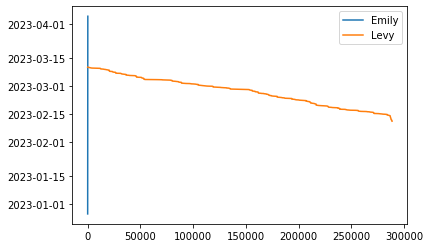

In [76]:
s1 = pd.Series(pd.to_datetime(emily_timestamp))
s2 = pd.Series(pd.to_datetime(levy_timestamp))

# Create DataFrame from the two Series
df = pd.DataFrame({'Emily': s1, 'Levy': s2})

# Plot the DataFrame using pandas
df.plot()

# Show the plot
plt.show()

In [111]:
len(levy_timestamp), len(emily_timestamp)

(150, 150)

This first graph takes into account all of Levy's data, 288505, and compares it to all of Emily's data: 150. 

The x-axis of the plot corresponds to the index values of the DataFrame, which in this case ranges from 0 to 149 for Emily's data and from 0 to 288504 for Levy's data.

Since Emily's list only has 150 values, each value is plotted at its corresponding index value on the x-axis, resulting in a stright vertical line. In contrast, Levy's list has 288505 values, so each value is plotted at a different index value on the x-axis, resulting in a more horizontal line.

In [112]:
emily_timestamp = emily_timestamp1[:150 :]
levy_timestamp = levy_timestamp1[:150 :]

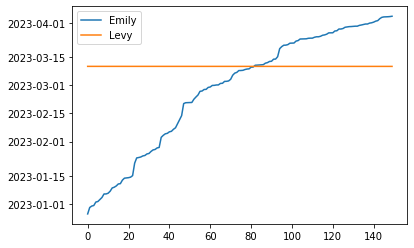

In [73]:
s1 = pd.Series(pd.to_datetime(emily_timestamp))
s2 = pd.Series(pd.to_datetime(levy_timestamp))

# Create a pandas DataFrame from the two Series
df = pd.DataFrame({'Emily': s1, 'Levy': s2})

# Plot the DataFrame using pandas
df.plot()

# Show the plot
plt.show()

If we cut Levy's data down to 150 values, so that both Emily and Levy have the same number of values, we see that for the first 150 values in levy's data, they are all on the same day: March 15th, 2023. Emily, on the other hand, has data from a much longer period of time, begining in January and ending in April. This makes her plotted data much more varied than Levy's. 

This tells us that the source of Levy's data is an app or program that is used multipal times a day, where as Emily's data is sourced from something that she only uses once a day or a few times a week. 


# Part 4: Analyze and visualize an additional element from  your personal data


To better undertand the data, I wanted look at the amount of usage for each month...

My questions: 
Q1: What Month had the highest number of usage for both Levy and I? 
Q2: What was the highest number of usage for me, overall?

In [126]:
month_counts = defaultdict(int)

for date_str in emily_timestamp:
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    month = date.month
    month_counts[month] += 1

# Print the results
emily_month_use = []
emily_month_count = []
for month, count in month_counts.items():
    emily_month_use.append(month)
    emily_month_count.append(count)
emily_month_use , emily_month_count

([12, 1, 2, 3, 4], [4, 32, 27, 77, 10])

In [139]:
month_counts = defaultdict(int)

for date_str in levy_timestamp1:
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    month = date.month
    month_counts[month] += 1

# Print the results
levy_month_use = []
levy_month_count = []
for month, count in month_counts.items():
    levy_month_use.append(month)
    levy_month_count.append(count)
levy_month_use , levy_month_count

([3, 2], [111000, 177505])

In [141]:
levy_month_count

[111000, 177505]

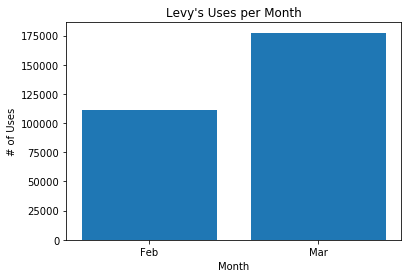

In [174]:
lmonths = ['Feb', 'Mar']


plot2 = plt.bar(lmonths, levy_month_count,label='Levy')

# set labels and title
plt.xlabel('Month')
plt.ylabel('# of Uses')
plt.title("Levy's Uses per Month")

# show graph
plt.show()

Here we see that Levy used his application A LOT of times over just two months, Feb and Mar. 

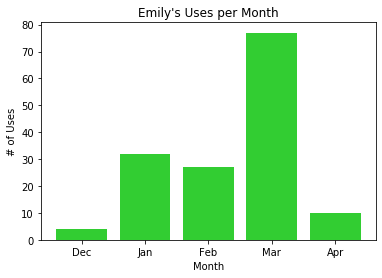

In [172]:
months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr']
plot = plt.bar(months, emily_month_count, label='Emily', color='limegreen')
plt.xlabel('Month')
plt.ylabel('# of Uses')
plt.title("Emily's Uses per Month")

# show graph
plt.show()

And here we see that I used my app a few times over the period over five months, Dec - Apr. 

My questions: 
Q1: What Month had the highest number of usage for both Levy and I? 
        A1: We both used our apps the most in March!
Q2: What was the highest number of usage for me, overall?
        A2: In March, I used my app (Reddit) 77 times. This makes sense because I have used r/gradschool and r/graddecisions a lot over March because I was waiting to hear back from graduate schools and programs. 